In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [45]:
electronic=pd.read_csv("ratings_Electronics.csv")

## 1. Read and explore the given dataset.

In [46]:
electronic.head(10)

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [47]:
electronic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   AKM1MP6P0OYPR  object 
 1   0132793040     object 
 2   5.0            float64
 3   1365811200     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [48]:
electronic.columns = ['userid','productid','ratings','timestamp']

In [49]:
electronic.head(11)

,userid,productid,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


## 2.Taking a subset of the dataset to make it less sparse/ denser

In [50]:
new_row = pd.DataFrame({'userid':'AKM1MP6P0OYPR','productid':'0132793040','ratings':5.0,'timestamp':1365811200}, index =[0]) 

In [51]:
electronic = pd.concat([new_row, electronic[:]]).reset_index(drop = True) 

In [52]:
electronic.head(11)

,userid,productid,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [53]:
electronic.describe()

,ratings,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [54]:
electronic.shape

(7824482, 4)

In [55]:
electronic.drop("timestamp",axis=1,inplace=True)

> The timestamp column which was not necessary was removed

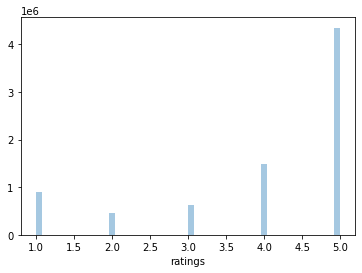

In [56]:
sns.distplot(electronic["ratings"],kde=False)

In [57]:
electronic.isnull().values.any() # To check if there are null values.

False

In [58]:
electronic1=electronic["userid"].value_counts()

In [59]:
to_remove = electronic1[electronic1 <= 250].index

In [60]:
electronic = electronic[~electronic.userid.isin(to_remove)]

In [61]:
electronic.shape

(7484, 3)

In [62]:
electronic.head()

,userid,productid,ratings
2162,A5JLAU2ARJ0BO,1400532655,1.0
3383,A3PD8JD9L4WEII,1400699169,5.0
5195,A36K2N527TXXJN,9800359788,5.0
5932,ADLVFFE4VBT8,9981719005,3.0
7748,A680RUE1FDO8B,B000001OMI,5.0


In [63]:
electronic.reset_index(drop=True)

,userid,productid,ratings
0,A5JLAU2ARJ0BO,1400532655,1.0
1,A3PD8JD9L4WEII,1400699169,5.0
2,A36K2N527TXXJN,9800359788,5.0
3,ADLVFFE4VBT8,9981719005,3.0
4,A680RUE1FDO8B,B000001OMI,5.0
...,...,...,...
7479,A3AYSYSLHU26U9,B00L3YHF6O,5.0
7480,AWPODHOB4GFWL,B00L3YHF6O,5.0
7481,A2XRMQA6PJ5ZJ8,B00L3YHF6O,5.0
7482,A25C2M3QF9G7OQ,B00LGQ6HL8,5.0


> The data was made less denser by keeping the users who have given\
  ratings more than 200 times. This was done due to the following reason.
 - To get a more accurate result 
 - The limitation of the system in which the model was build.

## 3. Popularity Recommender model

In [64]:
electronic.groupby('productid')['ratings'].mean().head()  

productid
1400532655    1.0
1400699169    5.0
9800359788    5.0
9981719005    3.0
B000001OMI    5.0
Name: ratings, dtype: float64

In [65]:
electronic.groupby('productid')['ratings'].mean().sort_values(ascending=False).head()  

productid
B002NU5O8I    5.0
B003QRX4PC    5.0
B003ZK5NZY    5.0
B003ZG9T62    5.0
B003ZBZ64Q    5.0
Name: ratings, dtype: float64

In [66]:
electronic.groupby('productid')['ratings'].count().sort_values(ascending=False).head()  

productid
B007OY5V68    11
B00DK2JQOQ     9
B000JMJWV2     9
B00DTZYHX4     9
B0082E9K7U     9
Name: ratings, dtype: int64

In [67]:
ratings_mean_count = pd.DataFrame(electronic.groupby('productid')['ratings'].mean()) 

In [68]:
ratings_mean_count['rating_counts'] = pd.DataFrame(electronic.groupby('productid')['ratings'].count())  

In [69]:
ratings_mean_count.head()

,ratings,rating_counts
productid,,
1400532655,1.0,1
1400699169,5.0,1
9800359788,5.0,1
9981719005,3.0,1
B000001OMI,5.0,1


> The popularity-based recommender model was build and top 5 items where calculated.\
  This method does not give the user a personalized item based on user interest.

## 5.Collaborative Filtering model

In [70]:
!pip install surprise

Defaulting to user installation because normal site-packages is not writeable


In [71]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

In [72]:
electronic.head(2)

,userid,productid,ratings
2162,A5JLAU2ARJ0BO,1400532655,1.0
3383,A3PD8JD9L4WEII,1400699169,5.0


In [73]:
electronic.shape

(7484, 3)

In [74]:
data = Dataset.load_from_df(electronic[['userid', 'productid', 'ratings']], reader)

In [75]:
data.df.head(2)

,userid,productid,ratings
2162,A5JLAU2ARJ0BO,1400532655,1.0
3383,A3PD8JD9L4WEII,1400699169,5.0


## 4.Splitting the data randomly into a train and test dataset.

In [76]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [77]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x0000022587A260C8>

In [78]:
print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(0))

A2XRMQA6PJ5ZJ8
B00BYRPM9M


In [79]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [80]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [81]:
test_pred = svd_model.test(testset)

## 6.Evaluate the above model(SVD)

In [82]:
accuracy.rmse(test_pred)

RMSE: 1.5646


1.564596331608358

In [83]:
from surprise import KNNWithMeans
from surprise import accuracy

algo_i = KNNWithMeans(k=5, sim_options={ 'user_based': False})

algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


## 6.Evaluate the above model(KNN with Kmeans)

In [84]:
test_pred=algo_i.test(testset)
print(accuracy.rmse(test_pred))

RMSE: 0.9325
0.9325425112284725


In [85]:
uid="A2XRMQA6PJ5ZJ8"
iid="B00BYRPM9M"
pred = algo_i.predict(uid, iid, r_ui=0.0, verbose=True)

user: A2XRMQA6PJ5ZJ8 item: B00BYRPM9M r_ui = 0.00   est = 5.00   {'actual_k': 5, 'was_impossible': False}


## 7. Getting the top 5 recommendations.

In [86]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == "A2XRMQA6PJ5ZJ8" ][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)

,iid,r_ui,est
21,B00109Y2DQ,5.0,4.325673
1429,B00AWKC0JM,5.0,4.325673
929,B000KB96QS,5.0,4.325673
26,B0097BEFYA,5.0,4.783333
947,B003C2B1O2,5.0,4.325673
988,B0000AW0QQ,5.0,4.325673
1137,B008AF383S,5.0,4.616667
1168,B00005V7L8,5.0,4.325673
1247,B003DZ1684,5.0,4.325673
1267,B0002WT6S8,5.0,4.325673


## 8.Summarising the insights

 > Collaborative filtering is a technique that can filter out items\
   that a user might like based on of reactions by similar users.\
   It is a type of personalized recommender model. In the above model\
   we have found the top 5 items based on user eatings and the one which other users might also like.
   

> Popularity based recommender model are not customized to the interest of the user this tends\
  to be a drawback of this type of model.